## Q&A Activity on Testing of Hypothesis 

Dataset utilized : Week_8_Q&A_dataset - Sheet1.csv

Objectives:

1.Carry out descriptive analytics on the dataset.

2.Check whether female and male students scored the same marks.

3.Whether test preparation helps the students

In [33]:
import pandas as pd

In [34]:
df = pd.read_csv('Week_8_Q&A_dataset - Sheet1.csv')
df

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


In [35]:
df1 = df.describe()
df1

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


### 1.Descriptive Analytics 

Frequency of tests completed and not completed

In [64]:
df['Test preparation'].value_counts()    #Denotes that 21 people haven't completed the test preparation, whereas 7 has completed.

none         21
completed     7
Name: Test preparation, dtype: int64

Measures of central tendency 

In [38]:
df['Total Marks'].mean()   #Mean

32.32142857142857

In [39]:
df['Total Marks'].median()  #Median

33.0

In [40]:
df['Total Marks'].mode()    #Mode

0    14
1    18
2    27
3    28
4    41
5    43
6    44
7    48
dtype: int64

Measures of dispersion

In [41]:
df['Total Marks'].var()     #Variance

155.11507936507937

In [42]:
df['Total Marks'].std()     #Standard Deviation

12.454520438984368

Pictorial representations

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Total Marks', ylabel='Test preparation'>

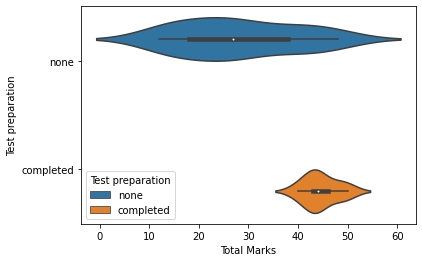

In [44]:
sns.violinplot(x='Total Marks',y='Test preparation',hue='Test preparation',data=df)        #Swarm plot

In [45]:
#Portrays that people who completed test preparation fall in 40 to 50 mark range, whereas people who haven't falls in the range from 10 to 50

In [46]:
pd.crosstab(index=df['Total Marks'], columns=df['Gender'], margins=True)   #Contingency Table

Gender,female,male,All
Total Marks,,,
12,1,0,1
13,1,0,1
14,0,2,2
18,1,1,2
21,1,0,1
23,0,1,1
24,0,1,1
27,2,0,2
28,1,1,2


### 2.Check whether female and male students scored the same marks.

In [65]:
df2=df.groupby('Gender')['Total Marks'].sum()   #The test scores of male and female are different
df2

Gender
female    540
male      365
Name: Total Marks, dtype: int64

### 3.Whether test preparation helps the students 

In [66]:
import scipy.stats as stats

In [78]:
Dnone = df[df["Test preparation"]=="none"]["Total Marks"]
Dcom = df[df["Test preparation"]=="completed"]["Total Marks"]

In [79]:
df.groupby('Test preparation').describe()

Total Marks                                                \
                       count       mean        std   min   25%   50%   75%   
Test preparation                                                             
completed                7.0  44.571429   3.359422  40.0  43.0  44.0  46.0   
none                    21.0  28.238095  11.661495  12.0  18.0  27.0  38.0   

                        
                   max  
Test preparation        
completed         50.0  
none              48.0

In [82]:
#we are performing the Shapiro-Wliks test on both items for Checking the Normality of Data

In [76]:
stats.shapiro(Dnone)    

ShapiroResult(statistic=0.935218095779419, pvalue=0.17507188022136688)

In [80]:
stats.shapiro(Dcom)

ShapiroResult(statistic=0.9187047481536865, pvalue=0.4593968093395233)

In [83]:
#we are using Levene’s test to test for homogeneity of variances (equal variances)

In [86]:
stats.levene(Dnone, Dcom)       #p-value suggests that the data follows the assumption of equal variances

LeveneResult(statistic=7.5816485225505446, pvalue=0.01061297110643562)

In [89]:
#Setting the hyposthesis

Null Hyposthesis (H0) : test prep does not help students

Alternative Hyposthesis (H1) : test prep helps students

In [87]:
res = stats.ttest_ind(Dnone, Dcom, equal_var=True)

display(res)

Ttest_indResult(statistic=-3.6143637527769217, pvalue=0.0012671292457320106)

In [88]:
print(0.0012671292457320106/2)

0.0006335646228660053


As the p-value (0.0006335646228660053) < alpha = 0.05, we reject the null hypothesis of the test. We can say that Average marks for students completed the test is higher than that of students not completd the test.So the test preparation helped the students